In [1]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
from datetime import date
from openfisca_matplotlib import graphs
from openfisca_matplotlib.cas_types import create_scenario_inferieur_smic, create_scenario_superieur_smic

import openfisca_france
TaxBenefitSystem = openfisca_france.FranceTaxBenefitSystem
tax_benefit_system = TaxBenefitSystem() 
year = 2014


## Initialisation d'un scénario

In [8]:
scenario = tax_benefit_system.new_scenario()
scenario.init_single_entity(
    parent1 = dict(
        date_naissance = date(year - 40, 1, 1),
        salaire_de_base = 20000,
        categorie_salarie = 'prive_non_cadre',
        ),
    menage = dict(
        loyer = 1000 * 12,
        statut_occupation_logement = "locataire_vide",
        ),
    period = 2014,
    )

In [9]:
simulation = scenario.new_simulation()

In [12]:
for month in range(1, 13):
    print month, 'rsa_base_ressources', simulation.calculate('rsa_base_ressources', period = '2014-{}'.format(month))
    print month, 'rsa_socle', simulation.calculate('rsa_socle', period = '2014-{}'.format(month))
    print month, 'rsa_forfait_logement', simulation.calculate('rsa_forfait_logement', period = '2014-{}'.format(month))
    print month, 'rsa_activite', simulation.calculate('rsa_activite', period = '2014-{}'.format(month))
    print month, 'rsa', simulation.calculate('rsa', period = '2014-{}'.format(month))

[0.]
1 rsa_base_ressources [0.]
1 rsa_socle [499.31]
1 rsa_forfait_logement [59.9172]
1 rsa_activite [0.]
1 rsa [439.3928]
2 rsa_base_ressources [433.8356]
2 rsa_socle [499.31]
2 rsa_forfait_logement [0.]
2 rsa_activite [268.9781]
2 rsa [334.45248]
3 rsa_base_ressources [867.6712]
3 rsa_socle [499.31]
3 rsa_forfait_logement [0.]
3 rsa_activite [169.59497]
3 rsa [169.59497]
4 rsa_base_ressources [1301.5068]
4 rsa_socle [499.31]
4 rsa_forfait_logement [0.]
4 rsa_activite [0.]
4 rsa [0.]
5 rsa_base_ressources [1301.5068]
5 rsa_socle [499.31]
5 rsa_forfait_logement [0.]
5 rsa_activite [0.]
5 rsa [0.]
6 rsa_base_ressources [1301.5068]
6 rsa_socle [499.31]
6 rsa_forfait_logement [0.]
6 rsa_activite [0.]
6 rsa [0.]
7 rsa_base_ressources [1301.5068]
7 rsa_socle [499.31]
7 rsa_forfait_logement [0.]
7 rsa_activite [0.]
7 rsa [0.]
8 rsa_base_ressources [1301.5068]
8 rsa_socle [499.31]
8 rsa_forfait_logement [0.]
8 rsa_activite [0.]
8 rsa [0.]
9 rsa_base_ressources [1301.5068]
9 rsa_socle [509.3]


/home/benjello/openfisca/openfisca-core/openfisca_core/simulations.py:212: Warning: The simulation.get_holder method has been deprecated. Please use entity.get_holder instead.
  Warning
/home/benjello/openfisca/openfisca-matplotlib/openfisca_matplotlib/graphs.py:187: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(True)


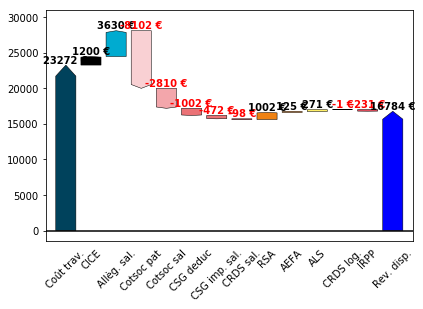

In [11]:
graphs.draw_waterfall(
    simulation = simulation,
    visible = ['revenu_disponible'],
    )

In [ ]:
BOUM

In [ ]:
scenario_kwargs = create_scenario_superieur_smic(year = 2014, nb_smic_max = 2, count = 100)

In [ ]:
graphs.draw_waterfall(
    simulation = simulation,
    visible = ['revenu_disponible'],
    )

In [ ]:
assert simulation.period.unit == 'year' 
assert simulation.period.start.year == 2014
assert simulation.period.start.month == 1
assert simulation.period.start.day == 1
assert simulation.period.size == 1

In [ ]:
from openfisca_matplotlib import graphs

In [ ]:
graphs.draw_bareme(simulation, x_axis = 'salaire_imposable')

In [ ]:
simulation.calculate_add('irpp', period = 2014)